In [7]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

<center><h1> MCD - Ciencia de Datos Responsable </h1><center>
<center><h2> Tarea 3: Modelos interpretables y xAI <h2><center>    

    
## Instrucciones:

- La siguiente tarea es **individual**. 
- La calificación de esta tarea se hará de forma **manual**, es decir, esta tarea no cuenta con test cases automáticos. Es por esto que al hacer entrega de su tarea podrá ver una calificación de "0%" y "Aprobado", independiente del contenido de su notebook.
- Cuenta con intentos ilimitados para el envío de su tarea.
- Ante cualquier duda o consulta pueden comunicarse a través de Foros o Salesforce. 

In [8]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


### Pregunta 1: Preprocese los datos de Census Income Dataset. Luego, entrene un árbol de decisión y evalúe este modelo desde la perspectiva de la interpretabilidad global. Utilice tanto tree_plot como un gráfico de la importancia de las features (3 ptos). 

**Instrucciones adicionales:** 

- Haga uso de los métodos que le provee el mismo modelo (inherentemente interpretable).

### Pregunta 2: Entrene otro modelo (que no sea interpretable) y realice el procedimiento necesario para obtener explicabilidad local de este modelo utilizando LIME. Obtenga las explicaciones para las predicciones de 3 registros de los datos de entrenamiento. Comente sus resultados (3 ptos).

**Instrucciones adicionales:** 

- Recuerde el uso de LabelEncoder en el pre-procesamiento de sus datos.


# Pregunta 1

In [10]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  object 
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.8+ MB


In [14]:
for i in df.columns:
    print('{} \nCard:\t{}\nType:\t{}\nUnique values:\n{}\n'.format(i, len(df[i].unique()), type(df[i][0]), df[i].unique()))

age 
Card:	74
Type:	<class 'numpy.float64'>
Unique values:
[25. 38. 28. 44. 34. 63. 24. 55. 65. 36. 26. 48. 43. 20. 37. 45. 22. 23.
 54. 32. 46. 56. 17. 29. 39. 52. 18. 21. 42. 33. 30. 47. 41. 19. 69. 50.
 31. 59. 49. 58. 40. 27. 57. 61. 51. 73. 53. 80. 62. 35. 72. 64. 68. 66.
 60. 67. 71. 70. 90. 77. 81. 74. 78. 82. 75. 85. 76. 89. 83. 79. 88. 87.
 84. 86.]

workclass 
Card:	7
Type:	<class 'str'>
Unique values:
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']

education 
Card:	16
Type:	<class 'str'>
Unique values:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']

education-num 
Card:	16
Type:	<class 'numpy.float64'>
Unique values:
[ 7.  9. 12. 10.  6. 15.  4. 13. 14.  3. 11.  5. 16.  8.  2.  1.]

marital-status 
Card:	7
Type:	<class 'str'>
Unique values:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'D

In [15]:
df.apply(lambda x: len(x.unique()), axis = 0).reset_index().sort_values(by = 0).T

,8,13,7,6,1,4,5,2,3,12,0,11,10,9
index,sex,income,race,relationship,workclass,marital-status,occupation,education,education-num,native-country,age,hours-per-week,capital-loss,capital-gain
0,2,2,5,6,7,7,14,16,16,41,74,96,97,121


In [16]:
# Binarias variables de cardinalidad 2
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

# education & education-num son redundantes
df.drop(columns='education-num', inplace=True)

# Parsear variables categóricas
ignore = ['sex', 'income']
catcol = df.select_dtypes(include='object').columns
for col in catcol:
    df[col] = df[col].astype('category')

df.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,0.0,0.0,40.0,United-States,0
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,0.0,0.0,50.0,United-States,0
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,0.0,0.0,40.0,United-States,1
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688.0,0.0,40.0,United-States,1
4,34.0,Private,10th,Never-married,Other-service,Not-in-family,White,1,0.0,0.0,30.0,United-States,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  float64 
 1   workclass       45222 non-null  category
 2   education       45222 non-null  category
 3   marital-status  45222 non-null  category
 4   occupation      45222 non-null  category
 5   relationship    45222 non-null  category
 6   race            45222 non-null  category
 7   sex             45222 non-null  int64   
 8   capital-gain    45222 non-null  float64 
 9   capital-loss    45222 non-null  float64 
 10  hours-per-week  45222 non-null  float64 
 11  native-country  45222 non-null  category
 12  income          45222 non-null  int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 2.4 MB


In [18]:
X = df.loc[:, df.columns != 'income']
y = df.loc[:, df.columns == 'income']

to_encode = X.select_dtypes(include='category')
encoders = {}
for catcol in to_encode.columns:
    encoder = LabelEncoder()
    X[catcol] = encoder.fit_transform(X[catcol])
    encoders[catcol] = encoder

X.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,2,1,4,6,3,2,1,0.0,0.0,40.0,38
1,38.0,2,11,2,4,0,4,1,0.0,0.0,50.0,38
2,28.0,1,7,2,10,0,4,1,0.0,0.0,40.0,38
3,44.0,2,15,2,6,0,2,1,7688.0,0.0,40.0,38
4,34.0,2,0,4,7,1,4,1,0.0,0.0,30.0,38


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
dt.score(X_test, y_test)

0.8061912658927585

In [25]:
y_pred = dt.predict(X_test)
f1_score(y_test,y_pred)

0.6036626723943026

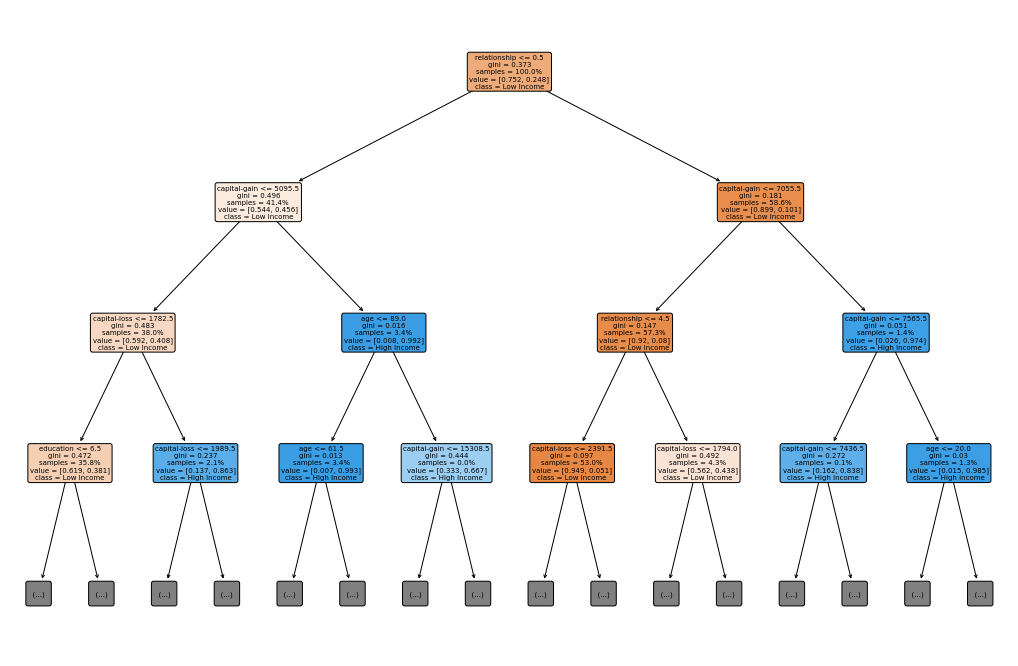

In [27]:
fig, ax = plt.subplots(1, figsize=(18, 12))
tree.plot_tree(dt,
               feature_names = X_train.columns,
               class_names = ['Low Income', 'High Income'],
               max_depth=3,
               proportion=True, filled=True, rounded=True, fontsize=7, ax=ax)
plt.show()

In [29]:
dt.feature_importances_

array([0.17971245, 0.0514122 , 0.10334469, 0.01056277, 0.08043735,
       0.22180233, 0.01995981, 0.0048762 , 0.14500921, 0.06093487,
       0.10044835, 0.02149978])

In [32]:
dt_importance_sorted_idx = np.argsort(dt.feature_importances_)
tree_indices = np.arange(0, len(dt.feature_importances_))

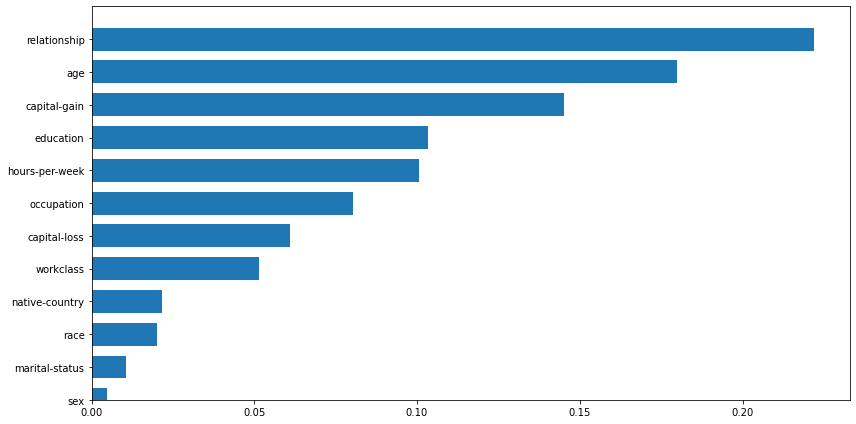

In [38]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.barh(range(0, 12), dt.feature_importances_[dt_importance_sorted_idx][-12:], height=0.7)
ax.set_yticks(range(0, 12))
ax.set_yticklabels(X_train.columns[dt_importance_sorted_idx][-12:])
ax.set_ylim(0, len(dt.feature_importances_[-12:]))

fig.tight_layout()
plt.show()

# Pregunta 2

In [39]:
# Entrenamiento del modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, np.ravel(y_train))

# Evaluación del modelo
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Calcular F1 Score
y_pred_rf = rf.predict(X_test)
f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1}")

# Realizando predicciones en datos de entrenamiento
y_pred_rf_train = rf.predict(X_train)


Accuracy: 0.8378109452736319
F1 Score: 0.6459087617668355


In [41]:
X_train.shape

(36177, 12)

In [42]:
y_pred_rf_train.nonzero()

(array([    3,     5,     7, ..., 36167, 36169, 36174]),)

In [43]:
print(y_pred_rf_train[0])
print(y_pred_rf_train[3])
print(y_pred_rf_train[10])

0
1
0


In [44]:
categorical_features = [X_train.columns.get_loc(col) for col in to_encode.columns]
categorical_names = {i: encoders[X_train.columns[i]].classes_ for i in categorical_features}

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns.tolist(),
                                 categorical_features=categorical_features,
                                 categorical_names=categorical_names,
                                 discretize_continuous=True,
                                 discretizer='decile',
                                 kernel_width=5)

exp0 = explainer.explain_instance(X_train.iloc[0, :], rf.predict_proba, num_features=4)
exp3 = explainer.explain_instance(X_train.iloc[3, :], rf.predict_proba, num_features=4)
exp10 = explainer.explain_instance(X_train.iloc[10, :], rf.predict_proba, num_features=4)


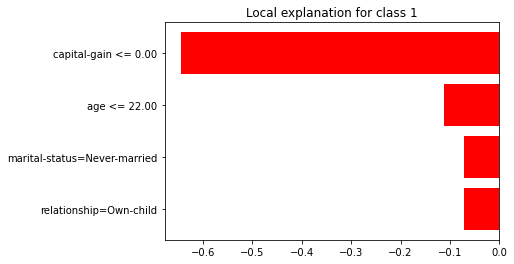

,Feature,Contribution
0,capital-gain <= 0.00,-0.645016
1,age <= 22.00,-0.112611
2,marital-status=Never-married,-0.072516
3,relationship=Own-child,-0.072000


In [46]:
exp0.as_pyplot_figure()
plt.show()
pd.DataFrame(exp0.as_list(),columns=['Feature', 'Contribution'])

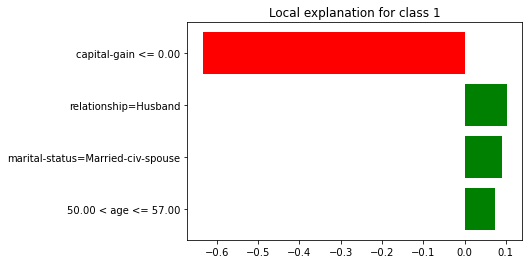

,Feature,Contribution
0,capital-gain <= 0.00,-0.645016
1,age <= 22.00,-0.112611
2,marital-status=Never-married,-0.072516
3,relationship=Own-child,-0.072000


In [48]:
exp3.as_pyplot_figure()
plt.show()
pd.DataFrame(exp0.as_list(),columns=['Feature', 'Contribution'])

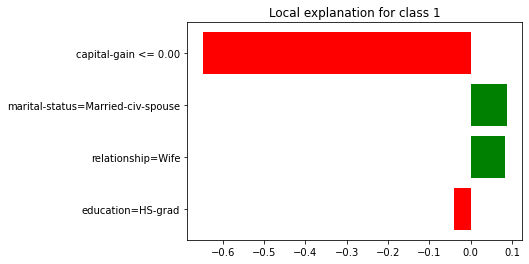

,Feature,Contribution
0,capital-gain <= 0.00,-0.645016
1,age <= 22.00,-0.112611
2,marital-status=Never-married,-0.072516
3,relationship=Own-child,-0.072000


In [49]:
exp10.as_pyplot_figure()
plt.show()
pd.DataFrame(exp0.as_list(),columns=['Feature', 'Contribution'])